#   04. Pytorch Custom DataSets

Doc:
1. https://www.learnpytorch.io/04_pytorch_custom_datasets/
2. https://youtu.be/Z_ikDlimN6A?t=71718

After learning Linear Regresion Models, Classification models, CNNs, now we need to learn how to work with any type of data
One of the ways to do is by: custom datasets.

## Domain Libraries
Depending on what you are working on (type of dataset - image, text, audio, recommendation), we want to look each of PyTorch domain librearies for existing data loading functions and customizable data loading functions.


In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

##  1. Get Some Data

Our Dataset is a subset of Food101 dataset
* 3 classes of food (targets = ["sushi", "steak", "pizza])
* 10% of training and testing data (750, 250)

By training our model in a subset of data, then we can improve our model more faster.

In [ ]:
import requests
import zipfile
from pathlib import Path

#Setup path to a data folder
DATA_PATH = Path("data/")
IMAGE_PATH = DATA_PATH/"pizza_steak_sushi"

#If the image folder doesnt exist, download it aand prepare it
if IMAGE_PATH.is_dir():
  print(f"{IMAGE_PATH} already exists....skipping ")
else:
  print(f"{IMAGE_PATH} does not exists....downloading ")
  IMAGE_PATH.mkdir(parents=True,
                   exist_ok=True)

  #Download by request from github--> downloads the zip file
  with open(DATA_PATH / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza, steak, sushi data..")
    f.write(request.content)

  #Unzip the zip file of pizza, steak, sushi data and paste in IMAGE_PATH
  with zipfile.ZipFile(DATA_PATH / "pizza_steak_sushi.zip", "r") as zip_ref:
      print(f"Unzipping pizza, steak and sushi data..")
      zip_ref.extractall(IMAGE_PATH)



data/pizza_steak_sushi does not exists....downloading 
Unzipping pizza, steak and sushi data..


## 2. Data Exploration and Preparation

In [ ]:
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its contents """
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'.")
walk_through_dir(IMAGE_PATH)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [ ]:
#Setup train and testing paths
train_dir = IMAGE_PATH / "train"
test_dir = IMAGE_PATH / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2.1 Visualising dataset and Image

Code -
1. Get all of the image paths
2. Pick random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Python's PIL (Pillow)
5. Then we will show the image anf print metadata

Random image path : data/pizza_steak_sushi/test/pizza/2218680.jpg
Random image class : pizza
image height : 512
image width : 512


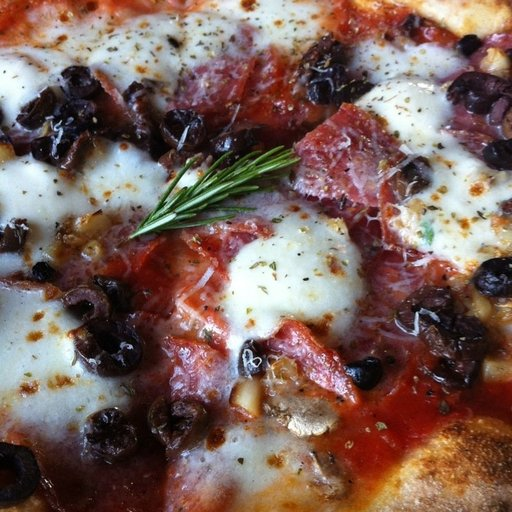

In [ ]:
import random
from PIL import Image

#Set seed
#random.seed(42)

#1. Get all the image paths
image_path_list = list(IMAGE_PATH.glob("*/*/*.jpg")) #glob is a sort of pattern matching function

image_path_list

#2. Pick a random image path
random_image_path = random.choice(image_path_list)
random_image_path

#3. Get image class from path name (name of directory)
image_class = random_image_path.parent.stem

image_class

#4. Open image with PIL or you can do it with read_image pytorch function
img = Image.open(random_image_path)

#5. Print metadata
print(f"Random image path : {random_image_path}")
print(f"Random image class : {image_class}")
print(f"image height : {img.height}")
print(f"image width : {img.width}")
img

<class 'numpy.ndarray'>
(512, 512, 3)
[[[173  74  33]
  [160  61  20]
  [148  50  13]
  ...
  [128  70  50]
  [128  70  58]
  [125  67  56]]

 [[171  73  34]
  [167  69  30]
  [164  66  29]
  ...
  [119  61  41]
  [120  62  48]
  [122  64  52]]

 [[178  82  44]
  [171  74  39]
  [171  74  39]
  ...
  [112  54  32]
  [114  57  40]
  [122  64  50]]

 ...

 [[ 95  65  37]
  [106  77  47]
  [113  84  54]
  ...
  [ 69  45  33]
  [ 72  48  36]
  [ 73  49  37]]

 [[120  90  56]
  [131 101  65]
  [134 104  68]
  ...
  [ 70  48  37]
  [ 71  47  35]
  [ 70  46  34]]

 [[126  94  56]
  [136 104  66]
  [137 105  66]
  ...
  [ 71  49  38]
  [ 80  56  44]
  [ 85  61  49]]]


Text(0.5, 1.0, 'Image_class: pizza | Image shape: (512, 512, 3)')

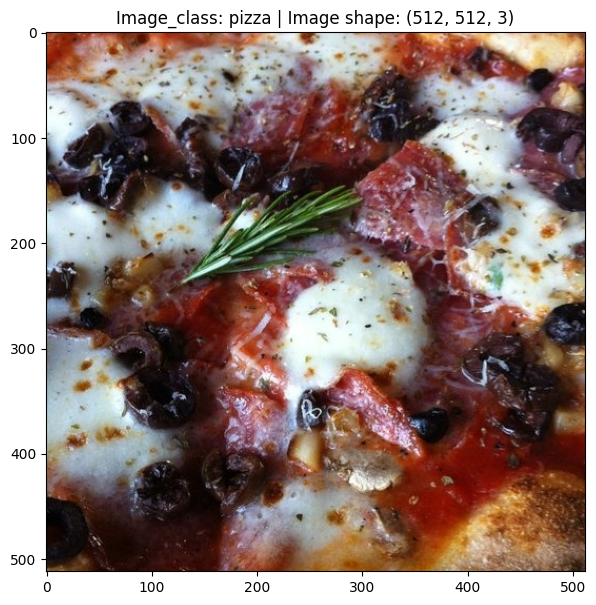

In [ ]:
#Try to visualize the image with matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

img_array = asarray(img)
print(type(img_array))
print(img_array.shape)
print(img_array)

plt.figure(figsize=(10,7))
plt.imshow(img_array)
plt.title(f"Image_class: {image_class} | Image shape: {img_array.shape}")


Text(0.5, 1.0, 'pizza')

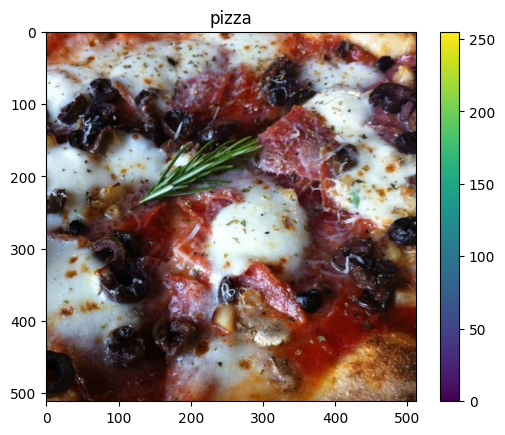

In [ ]:
image_class = random_image_path.parent.stem
implot = plt.imshow(img)
plt.colorbar()
plt.title(image_class)

Text(0.5, 1.0, 'Image Class : pizza | Shape : (512, 512, 3) ')

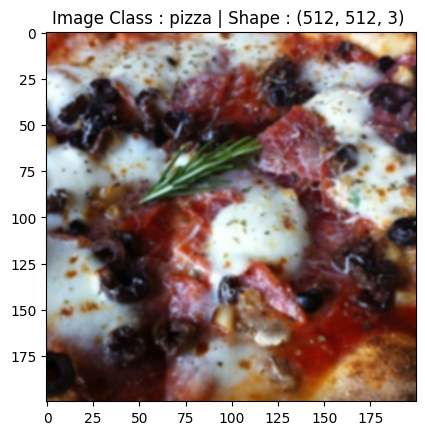

In [ ]:
img.thumbnail((200,200))
imgplot = plt.imshow(img, interpolation="bicubic")
plt.title(f"Image Class : {image_class} | Shape : {img_array.shape} ")

## Transforming data (Image -> Tensor)

Before we can use our image data with Pytorch:
1. Turn your target data to tensors(in our case, numerical representation of our images)
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader` which convert our data to batched iterable format

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 3.1 Transforming data with `torchvision.transforms`

Transforms help you get your images ready to be used with a model/perform data augmentation
Doc: https://pytorch.org/vision/stable/transforms.html#transforming-and-augmenting-images

In [ ]:
#Write a transform for image
from torchvision.transforms import v2

data_transforms = transforms.Compose([
    #Resize our images to 64x64
    transforms.Resize(size=(64,64)),

    #Flip the images randomly to avoid Overfitting
    transforms.RandomHorizontalFlip(p=0.5),

    #Turn image to torch tensor
    transforms.ToTensor() #converts PIL/ndarray --> Pytorch Tensor
])

In [ ]:
transformed_img = data_transforms(img)
print(f"Transformed Image : {transformed_img}")
print(f"Transformed Image shape: {transformed_img.shape}")

Transformed Image : tensor([[[0.6078, 0.7412, 0.8471,  ..., 0.5412, 0.5843, 0.6549],
         [0.7961, 0.8980, 0.9137,  ..., 0.5569, 0.5843, 0.6235],
         [0.8000, 0.9176, 0.9373,  ..., 0.6078, 0.5608, 0.6039],
         ...,
         [0.4706, 0.4902, 0.5373,  ..., 0.0588, 0.0745, 0.0863],
         [0.3686, 0.3843, 0.4549,  ..., 0.1137, 0.0941, 0.0902],
         [0.2431, 0.2902, 0.4039,  ..., 0.3059, 0.3137, 0.2667]],

        [[0.3765, 0.4902, 0.6431,  ..., 0.1569, 0.2235, 0.2941],
         [0.6157, 0.7451, 0.7765,  ..., 0.1647, 0.1765, 0.2235],
         [0.5961, 0.8078, 0.8627,  ..., 0.2118, 0.1333, 0.1569],
         ...,
         [0.3490, 0.3647, 0.3961,  ..., 0.0431, 0.0588, 0.0667],
         [0.2588, 0.2706, 0.3333,  ..., 0.0667, 0.0627, 0.0667],
         [0.1529, 0.2000, 0.2902,  ..., 0.1843, 0.2000, 0.1765]],

        [[0.2196, 0.2745, 0.3922,  ..., 0.0353, 0.1020, 0.1725],
         [0.3882, 0.5098, 0.5412,  ..., 0.0549, 0.0588, 0.0980],
         [0.4039, 0.6353, 0.6824,  ...

In [ ]:
def plot_transformed_images(image_paths: list,
                            transform,
                            n=3,
                            seed=42):
  """
    Function:
              Selects random images from an image path and tranforms
              them and plot the original vs tranformed ver
              Note: .permute(1,2,0) is done internally
    Args:
          image_paths,
          transform,
          n=3,
          seed=42
    Return: Plot of original vs transformed images
  """
  if(seed):
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, axis = plt.subplots(nrows=1, ncols=2)
      axis[0].imshow(f)
      axis[0].set_title(f"Original\nSize: {f.size}")
      axis[0].axis(False)

      #Transform and plot target Image
      transformed_image = transform(f).permute(1, 2, 0) #(C, H, W) (Pytorch's default)---> (H, W, C)(matplotlib's required shape)
      axis[1].imshow(transformed_image) #Note .uint8 is used as this is giving Clipping warning in Data Augmentation
      axis[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      axis[0].axis(False)

      fig.suptitle(f"Class: {image_path.stem}", fontsize=16)


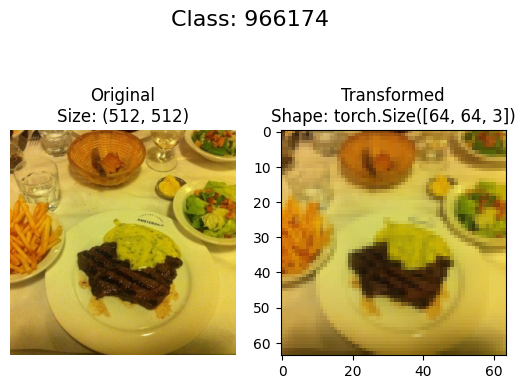

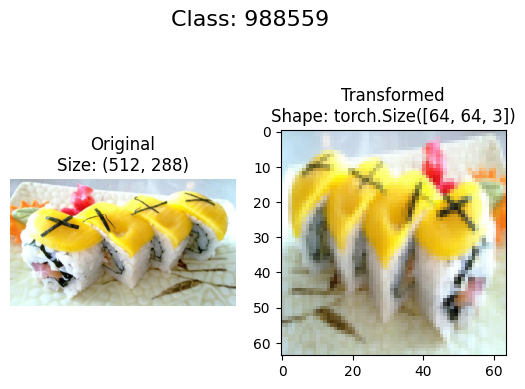

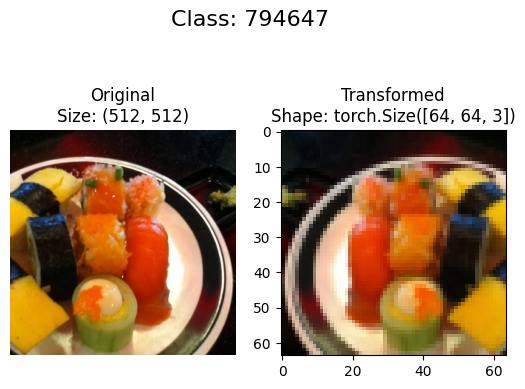

In [ ]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transforms,
                        n=3,
                        seed=42)

##   4.  Option 1: Loading Image data using ImageFolder AKA `Creating the Train and Test DataSets`

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transforms,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transforms)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
#Get class names
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_names, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
#Check the length of dataset
len(train_data), len(train_data)

(225, 225)

In [ ]:
#Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: {img}")
print(f"Image tensor data_type : {type(img)}")
print(f"Class : {class_names[label]}")
print(f"Image Shape: {img.shape}")

Image tensor: tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original shape [Color_channel, Height, Width]: torch.Size([3, 64, 64])
Permuted shape [Height, Width,Color_channel]: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

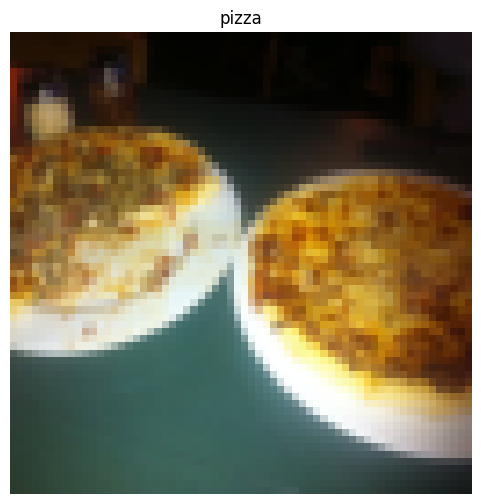

In [ ]:
#Rearrange the orde of dimentions
img_permuted = img.permute(1,2,0)

#Print out for clarity
print(f"Original shape [Color_channel, Height, Width]: {img.shape}")
print(f"Permuted shape [Height, Width,Color_channel]: {img_permuted.shape}")

#plot the image
plt.figure(figsize=(6,6))
plt.imshow(img_permuted)
plt.axis("off")
plt.title(class_names[label])

## 4.1 Turn Loaded Images to DataLoader
A DataLoader is going to turn our Dataset into iterables and we can customize batch number

In [ ]:
import os
os.cpu_count()

2

In [ ]:
#Turn train and test datasets into DataLoader
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7912c018f2e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7912c018f670>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
225/32, 75/32

(7.03125, 2.34375)

In [ ]:
img, label = next(iter(train_dataloader))

#Print out
print(f"Iamge shape: {img.shape}")
print(f"Label shape: {label}")

Iamge shape: torch.Size([32, 3, 64, 64])
Label shape: tensor([2, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1,
        1, 2, 0, 1, 0, 0, 0, 1])


## 5. Option 2: Loading Image Data with Custom DataSets

Functionality
1. load image from file
2. class_names from the Dataset
3. classes as dictionary form the Dataset

Pros:
* Can create a `Dataset` out of almost anything
* NOt limited to PyTorch pre-built `Dataset` functions

Cons:
* Even though you can create a Dataset out of anything, but it does not mean it will work
* More code == Prone to Errors

All custom datasets in PyTorch, often subclasses `torch.utils.data.Dataset`

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List



In [ ]:
#Instance of torchvision.datasets.ImageFolder
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_names, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory (ideally is in standard Image Classification format)
2. Raise an error if class names are not found
3. Turn class names into a dict and a list and return them

In [ ]:
#Setup path directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

#Get the class mames from the target directory
class_names_found = sorted(entry.name for entry in list(os.scandir(target_directory)))
class_names_found



Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(dir: str) -> Tuple[List[str], Dict[str, int]]:
  """ Finds the class folder names in a target directory """

  #1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(dir) if entry.is_dir())

  #2. Raise an error if class names couldnt be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {dir}....")

  #3. Create a dictionary of index label
  class_to_idx =  {class_name: i for i,class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(dir=target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2  Create a custom Dataset to replicate ImageFolder

To create our own custom dataset, we want to:
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory as well as a transform
3. Create several attributes:
    * paths - paths of images
    * transform - transformer function
    * classes - a list of the target classes
    * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_image()`, this function will open an image
5. Overwrite `__len__()` method to return length of our dataset
6. Overwrite `__getitem__()` method to return a given sample when passed an index

Doc: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
All datasets that represent a map from keys to data samples should subclass it. All subclasses should overwrite
*  `__getitem__()` : **supporting fetching a data sample for a given key**.
* `__len__()`: Subclasses could also optionally overwrite this, which is **expected to return the size of the dataset** by many Sampler implementations and the default options of DataLoader

In [ ]:
#Write a custom dataset class
from torch.utils.data import Dataset

#1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

  #2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    #3. Create class attributes

    #Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))

    #Setup transforms
    self.transform = transform

    #Create classes and class_to_idx atttributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  #4. Create a function to load images
  def load_images(self, index: int) -> Image.Image:
    ''' Opens an image via a path and returns it '''
    image_path = self.paths[index]
    return Image.open(image_path)

  #5. Overwrite __len__()
  def __len__(self) -> int:
    """ Returns the total number of samples """
    return len(self.paths)

  #5. Overwrite __getitem__()
  # Tuple[torch.Tensor, int] - imitates img, label = train_data[0]
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:

    """ Returns a particular sample od day and label (X,y)"""
    img = self.load_images(index)
    class_name = self.paths[index].parent.name #expects path in format:  data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    #Transform if necessary
    if self.transform:
      return self.transform(img), class_idx #Return data, label(X,y)
    else:
      return img, class_idx #return untramsformed image and label


In [ ]:
#Create a new transform
from torchvision.transforms import transforms
train_transforms = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()
])

test_transforms = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()
])

In [ ]:
#Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7912c018f280>,
 <__main__.ImageFolderCustom at 0x7912c018d600>)

In [ ]:
len(train_data_custom), len(train_data)

(225, 225)

In [ ]:
len(test_data_custom), len(test_data)

(75, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
train_data_custom.paths

[PosixPath('data/pizza_steak_sushi/train/sushi/2797464.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/93139.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2590819.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/773725.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/686426.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1209865.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/14046.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1129338.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2267190.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2120573.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3251688.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/843815.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/821108.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3081701.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2021685.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/148799.jpg'),
 PosixPath('data/

### 5.3 Create a function to display Random Images

1. Take in a Dataset and a number of other parameters such as class names and how many images to visualize
2. Limit no. of images = 10
3. Set random seed for reproducibility
4. Get a list of random sample indexes from target datasets
5. Set matplotlib plot
6. Loop through the random sample images and plot
7. Make sure dimensions of image = [H, W, C] use `.permute(1,2,0)`

In [ ]:
#1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: list[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

  """
    Args:
        dataset: torch.utils.data.Dataset,
        classes: list[str] = None,
        n: int = 10,
        display_shape: bool = True,
        seed: int = None

    Return:
        Plot of Images of specified number and dataset
  """
  #2. Adjust display if n is too high
  if n>10:
    n=10
    display_shape = False
    print(f"For display n cannot exceed 10, defaulted 10")

  #3. Set the seed
  if (seed):
    random.seed(seed)

  #4. Get random sample indexes from a range of indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)
  print(f"Random Sample Index : {random_samples_idx}")

  #5. Plot image
  plt.figure(figsize=(16,8))

  #6. Loop through the random sample images and plot
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    #7. Adjust tensor dimensions for plotting
    targ_adjusted_img = targ_image.permute(1,2,0) #[C,H,W] --> [H,W,C]

    #Plot adjusted image
    plt.subplot(1, n, i+1)  #nrows, ncols, index, **kwargs
    plt.imshow(targ_adjusted_img)
    plt.axis("off")
    print(f"Target Label : {targ_label}")

    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape: {targ_adjusted_img.shape}"

    plt.title(title)


In [ ]:
random.sample(range(len(train_data_custom)), k=10)

[62, 57, 35, 188, 26, 173, 189, 139, 22, 151]

In [ ]:
img, label = train_data[0][0], train_data[2][1]

Random Sample Index : [108, 8, 7, 23]
Target Label : 1
Target Label : 0
Target Label : 0
Target Label : 0


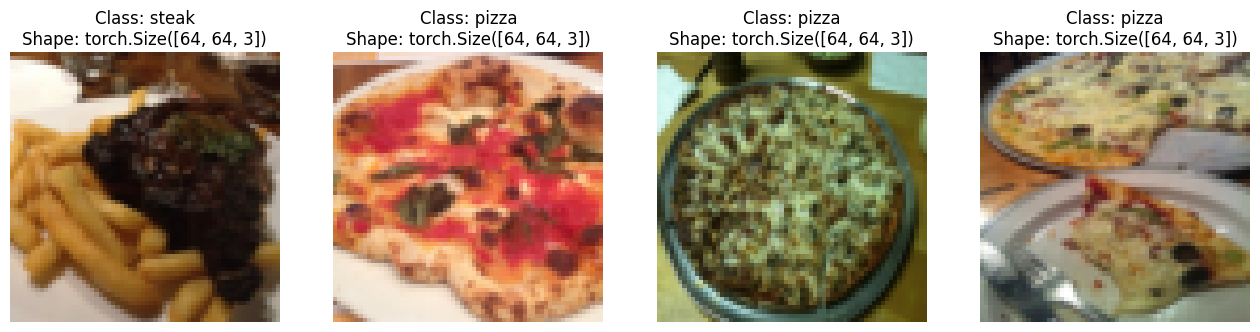

In [ ]:
#Display random images from ImageFolder created dataset
display_random_images(dataset=train_data,
                      classes=class_names,
                      n=4,
                      display_shape=True,
                      seed=None)


Random Sample Index : [163, 28, 6, 189, 70]
Target Label : 1
Target Label : 2
Target Label : 2
Target Label : 1
Target Label : 2


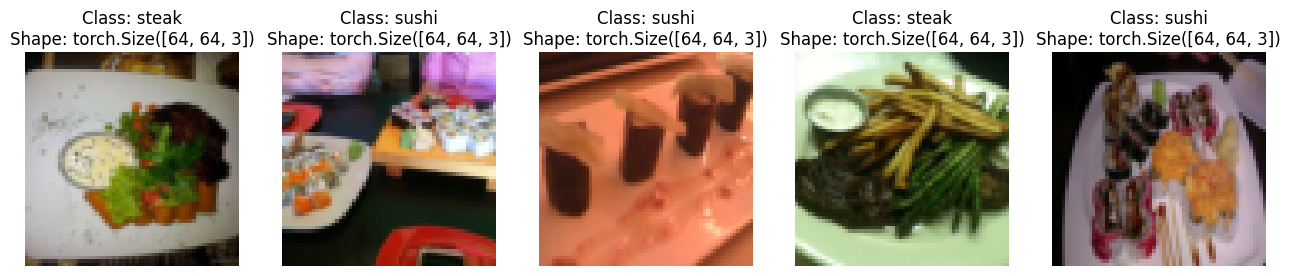

In [ ]:
#Display random images from the ImageFolderCustom Dataset

display_random_images(dataset=train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=42)

###5.4  DataLoader for our Custom Dataset

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)
test_dataloader_custom = DataLoader(test_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7912bfe7bb80>,
 <torch.utils.data.dataloader.DataLoader at 0x7912bfe7bbb0>)

In [ ]:
#get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom

(torch.Size([32, 3, 64, 64]),
 tensor([2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0,
         0, 2, 2, 2, 1, 2, 2, 0]))

## 6. Data AUgmentation (Pre-Processing Pipeline)

Data Augmentatio is the process of artificially add diversity to your training data. In case of image data, this may mean applying various image transformations to training images. This is to prevent overfitting of our model to our data.

Lets take a look at one particular type of data augmentaion used to train PyTorch vision models to state of the art levels...
* Blog: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

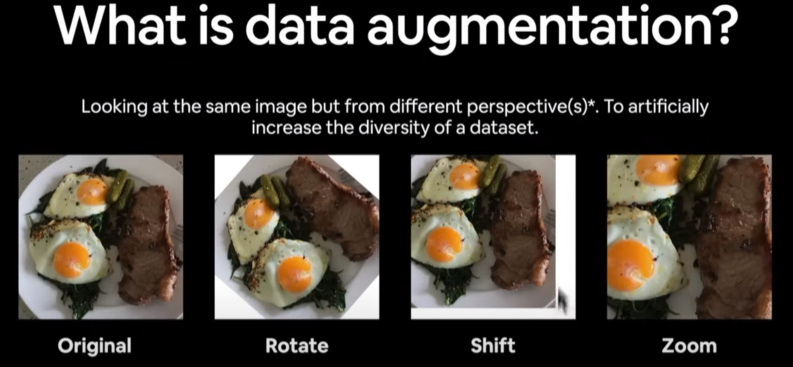

In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=32),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [ ]:
#Due to the new release of v2 transforms, some of the methods in course are
#deprecated, so its better to use v2
from torchvision.transforms import v2

train_transform_v2 = v2.Compose([
    v2.ToImage(), # Convert to tensor, only needed if you had a PIL image
    v2.ToDtype(torch.uint8, scale=True),# optional, most input are already uint8 at this point
    v2.RandomHorizontalFlip(p=0.5),
    v2.Resize(size=(64, 64)),

    transforms.TrivialAugmentWide(num_magnitude_bins=32),
    v2.ToDtype(torch.float32, scale=True), # Normalize expects float input
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), #
])

test_transform_v2 = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.uint8, scale=True), #Optional
    v2.Resize(size=(64, 64)),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


WARNING:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
if `v2.ToDtype(torch.float32, scale=True), #Giving Clipping Warnings
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),`
is used in train_transform_v2

In [ ]:
#get all image paths
image_path_list = list(IMAGE_PATH.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/2385731.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2190404.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/887831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3177743.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2715127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1434806.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2394442.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2521706.jpg')]

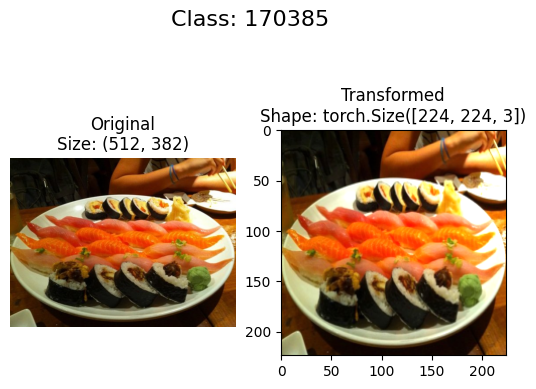

In [ ]:
#Plot random images with v1 Preprocessor pipeline
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=1,
    seed=None
)

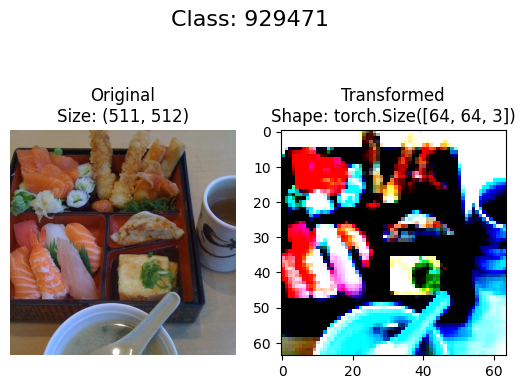

In [ ]:
#Plot random images with v2 preporcessor pipeline
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform_v2,
    n=1,
    seed=None
)

## 7. Model 0: TinyVGG without Data Augmentation
Replicating TinyVGG architecture from CNN Explainer website

###7.1 Creating transforms and loading data for Model 0

In [ ]:
#Create a simple transform
from torchvision.transforms import v2

simple_transform = v2.Compose([
    v2.ToImage(),
    v2.Resize(size=(64,64))
])

In [ ]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                 transform=train_transform_v2,
                                 target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                transform=test_transform_v2)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                  ToImage()
                  ToDtype(scale=True)
                  RandomHorizontalFlip(p=0.5)
                  Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  TrivialAugmentWide(num_magnitude_bins=32, interpolation=InterpolationMode.NEAREST, fill=None)
                  ToDtype(scale=True)
                  Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                  ToImage()
                  ToDtype(scale=True)
                  Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  ToDtype(scale=True)
                  Normalize(mean=[0.4

In [ ]:
from torch.utils.data import DataLoader
import os
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_DataLoader_simple = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)
test_DataLoader_simple = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)
train_DataLoader_simple, test_DataLoader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7912bf2b2740>,
 <torch.utils.data.dataloader.DataLoader at 0x7912bf2b27a0>)

In [ ]:
img, label = next(iter(train_DataLoader_simple))
img, label

(tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           ...,
           [ 0.2624,  0.3481,  0.4508,  ...,  0.8276,  0.7248,  0.6563],
           [ 0.2624,  0.3309,  0.4166,  ...,  0.7077,  0.6049,  0.5364],
           [ 0.1597,  0.2624,  0.3481,  ...,  0.5364,  0.4508,  0.3652]],
 
          [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           ...,
           [ 0.4853,  0.5553,  0.6254,  ...,  0.8004,  0.7129,  0.6078],
           [ 0.4153,  0.4853,  0.5553,  ...,  0.6604,  0.5553,  0.4328],
           [ 0.3978,  0.4328,  0.5028,  ...,  0.5553,  0.4153,  0.2927]],
 
          [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
           [-

### 7.2 Create TinyVGG model from scratch

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*169,
                  out_features=output_shape)
    )

  def forward(self, x):
    #x = self.conv_block_1(x)
    #print(f"Shape after conv_block_1 : {x.shape}")
    #x = self.conv_block_2(x)
    #print(f"Shape after conv_block_2 : {x.shape}")
    #x = self.classifier(x)
    #print(f"Shape after classifier : {x.shape}")
    #return x

    #This method benifits from operator fusion - essentially GPU computes faster
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))


In [ ]:
class VGG16(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, #conv_1_1
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, #conv_1_2
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(  #conv_2_1
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,  #conv_2_2
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, #conv_3_1
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, #conv_3_2
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, #conv_3_3
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, #conv_4_1
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, #conv_4_2
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, #conv_4_3
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_5 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, #conv_5_1
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, #conv_5_2
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, #conv_5_3
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16,
                  out_features=output_shape)
    )

  def forward(self, x):

    #This method benifits from operator fusion - essentially GPU computes faster
    return self.classifier(self.conv_block_5(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x))))))

#To use this model you need to increase the size of image


In [ ]:
img.shape

torch.Size([32, 3, 64, 64])

In [ ]:
#Instance of our model
model_0 = TinyVGG(
    input_shape = 3,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a Forward Pass on a single image (to test the model)

In [ ]:
#Get a single image batch
image_batch, label_batch = next(iter(train_DataLoader_simple))
image_batch.shape, label_batch.shape


(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
rand_tensor = torch.randn(size=(32, 3, 64, 64))
rand_tensor.shape

torch.Size([32, 3, 64, 64])

In [ ]:
#try forward pass
#model_0(rand_tensor.to(device))
model_0(image_batch.to(device)).shape

torch.Size([32, 3])

**NOTE**: I used `simple_transform` as transform in datasets.ImageFolder, but it was somehow returning a `Input:(signed char)` error. But using the `train_transform_v2` the error was gone.

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.4 Create train and test loop functions

In [ ]:
def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):

    """
    Args:
              model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer
               device: torch.device = device
    """
    model.to(device)
    model.train()
    train_loss, train_acc = 0,0

    for batch, (X,y) in enumerate(dataloader):

      #1. set to target device
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss = loss_fn(y_pred, y)
      train_loss += loss.item()  #NOTE : loss.item() -> just a single integer
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class==y).sum().item()/len(y_pred)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    #print(f"Train Loss : {train_loss:.4f} | Train Accuracy : {train_acc:.2f}\n")
    return train_loss, train_acc*100

def test_step(model:nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = device):

    """
    Args:     model:nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = device
    """
    model.eval()
    model.to(device)
    test_loss, test_acc = 0,0
    with torch.inference_mode():
      for batch, (X, y) in enumerate(dataloader):

        X, y = X.to(device), y.to(device)
        test_pred_logits = model(X)

        loss = loss_fn(test_pred_logits, y)
        test_loss += loss.item()
        test_pred_labels = torch.argmax(test_pred_logits, dim=1)
        test_acc += (test_pred_labels==y).sum().item()/len(test_pred_labels)


    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    #print(f"Test Loss : {test_loss:.4f} | Test Accuracy : {test_acc:.2f}\n")
    return test_loss, test_acc*100



In [ ]:
#training the model
from tqdm.auto import tqdm

def Model_Trainer(model: nn.Module,
            epochs: int,
            train_dataloader: torch.utils.data.DataLoader,
            test_dataloader: torch.utils.data.DataLoader,
            optimizer: torch.optim.Optimizer,
            loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
            device: torch.device = device):
  #2. Create an empty dictionary
  results = {"train_loss": [],
             "train_acc" : [],
             "test_loss": [],
             "test_acc": []}

  for epoch in tqdm(range(epochs), "Loading . . . "):
    train_loss, train_acc = train_step(model=model,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             device=device)
    test_loss, test_acc = test_step(model=model,
             dataloader=test_dataloader,
             loss_fn=loss_fn,
             device=device)

    #print out whats happening
    print(f"Epoch : {epoch} | Train Loss : {train_loss:.3f} | Train Accuracy : {train_acc:.2f} | Test Loss : {test_loss:.3f} | Test Accuracy : {test_acc:.2f} \n")

    #Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  #Return the filled results at the end
  return results


In [ ]:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download ...")
else:
  print("Downloading helper_function.py ...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
    print("Download Complete")


Download Complete


### 7.7 Train and evaluate model_0

In [ ]:
from helper_functions import accuracy_fn
device = "cuda" if torch.cuda.is_available() else "cpu"
from timeit import default_timer as timer

#Setting Loss function #setting optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.0001)

#Instance of our model
model_0 = TinyVGG(
    input_shape = 3,
    hidden_units=50,
    output_shape=len(class_names)
).to(device)


In [ ]:
#Start timer
start_time = timer()

#Train model_0
result_model_0 = Model_Trainer(model=model_0,
        epochs=5,
        train_dataloader=train_DataLoader_simple,
        test_dataloader=test_DataLoader_simple,
        loss_fn=loss_fn,
        optimizer=optimizer,
        device=device)

#End timer
end_time = timer()
print(f"Total training time : {end_time - start_time:.3f}sec")

Loading . . . :   0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0 | Train Loss : 1.095 | Train Accuracy : 41.41 | Test Loss : 1.104 | Test Accuracy : 26.04 

Epoch : 1 | Train Loss : 1.099 | Train Accuracy : 29.69 | Test Loss : 1.104 | Test Accuracy : 26.04 

Epoch : 2 | Train Loss : 1.101 | Train Accuracy : 30.47 | Test Loss : 1.104 | Test Accuracy : 26.04 

Epoch : 3 | Train Loss : 1.099 | Train Accuracy : 30.47 | Test Loss : 1.104 | Test Accuracy : 26.04 

Epoch : 4 | Train Loss : 1.095 | Train Accuracy : 42.19 | Test Loss : 1.104 | Test Accuracy : 26.04 

Total training time : 59.104sec


In [ ]:
result_model_0

{'train_loss': [1.0953319072723389,
  1.098621740937233,
  1.1014812588691711,
  1.0994320064783096,
  1.0951410382986069],
 'train_acc': [41.40625, 29.6875, 30.46875, 30.46875, 42.1875],
 'test_loss': [1.104021151860555,
  1.104021151860555,
  1.104021151860555,
  1.104021151860555,
  1.104021151860555],
 'test_acc': [26.041666666666668,
  26.041666666666668,
  26.041666666666668,
  26.041666666666668,
  26.041666666666668]}

### 7.8 Plot the loss curves of Model 0

In [ ]:
#Functionizing plot of loss curve
def plot_loss_curves(results: Dict[str, List[float]]):
  """ Plots training curves of results dictionary """
  #Get the loss values from results dict
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  #Get the accuracy values from results dict
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  #Set plot
  plt.figure(figsize=(15,7))

  #Plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss Curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()

  #Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy Curve")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()

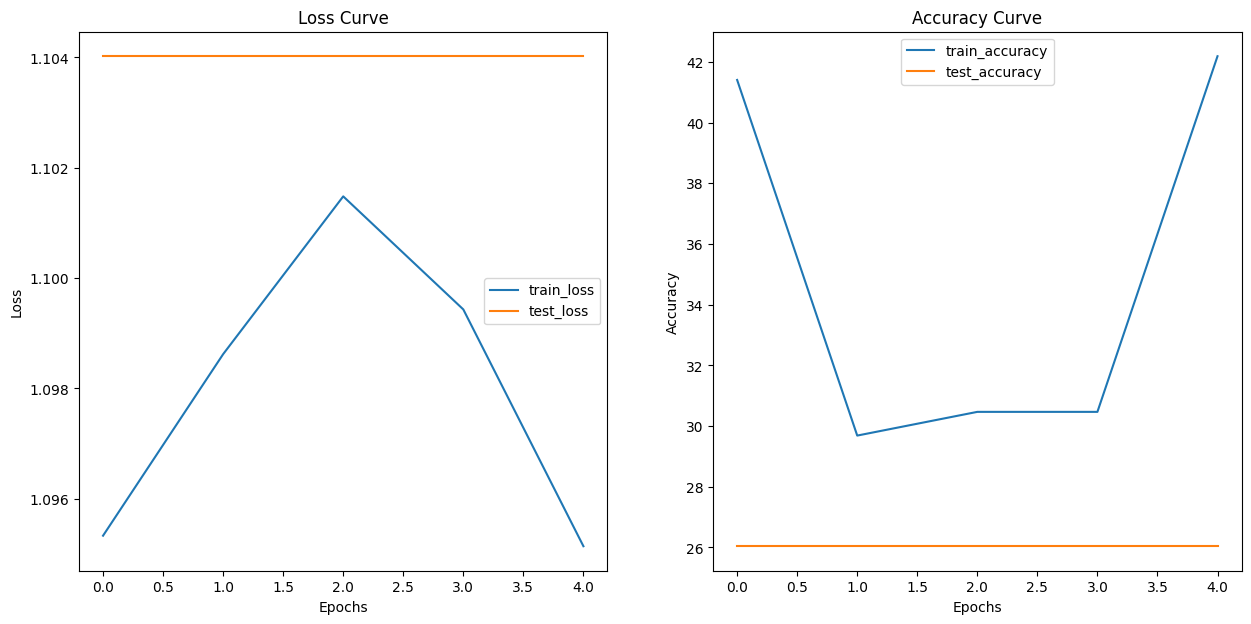

In [ ]:
plot_loss_curves(result_model_0)

From Loss curve we can clearly see that our model is `overfitting` to the data, as train_loss is going down eventually but it is not reflected in test_loss

## 8. Ideal Loss - What Should it look like?

A loss curve is a useful tool determine if your model is training properly or not.

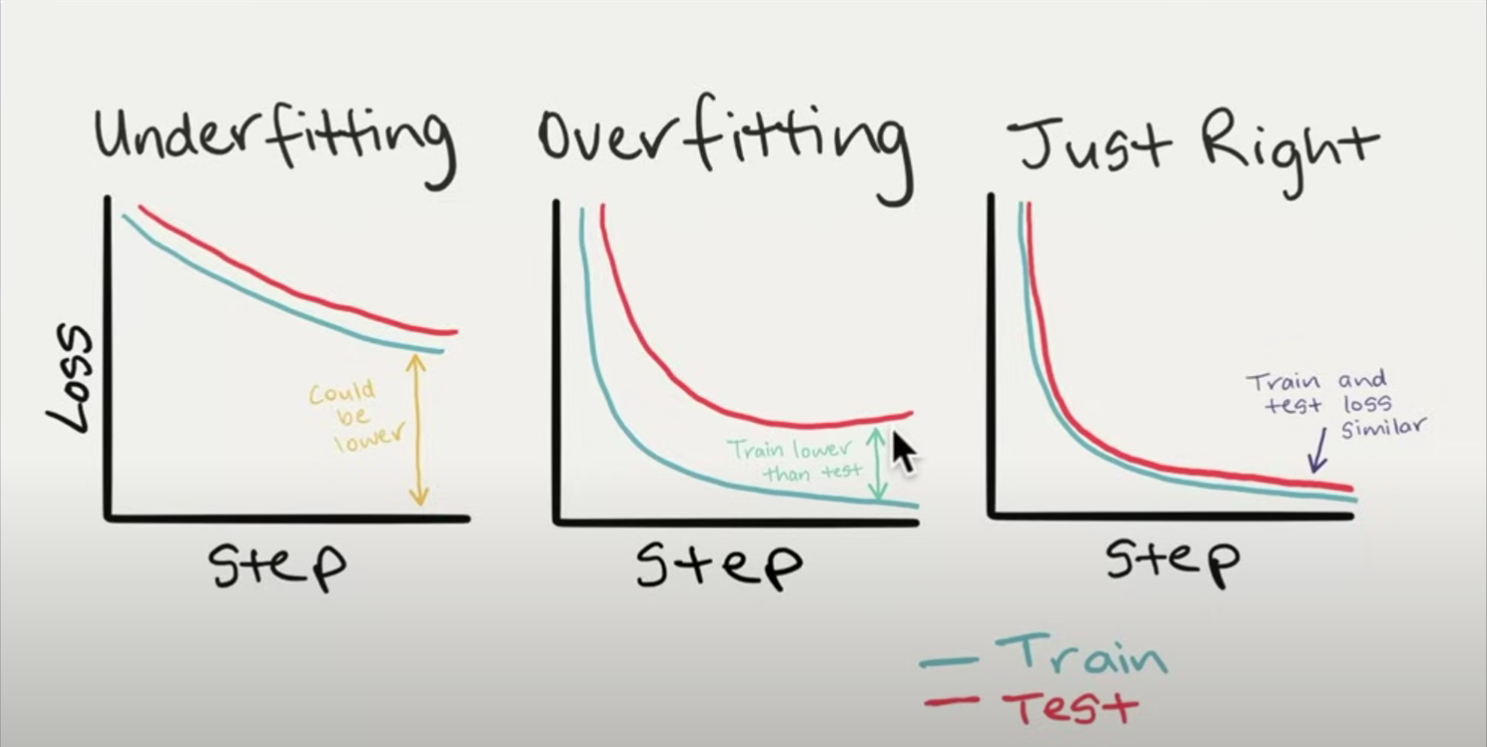

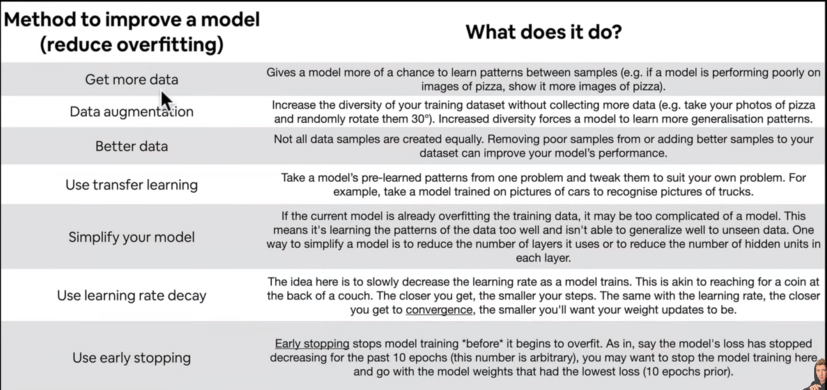

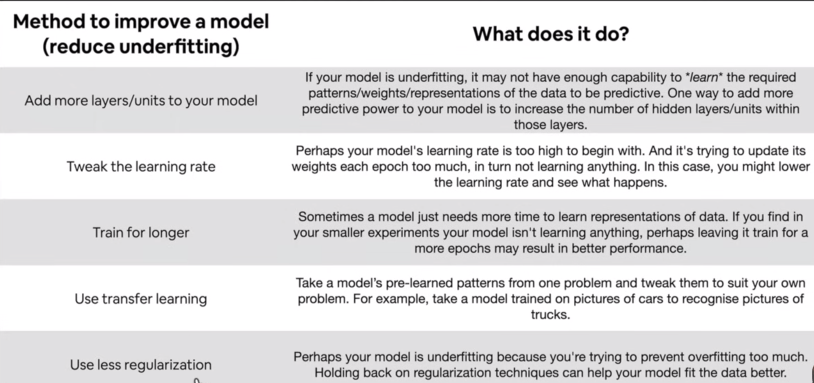

**Learning Rate Scheduler**: https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate

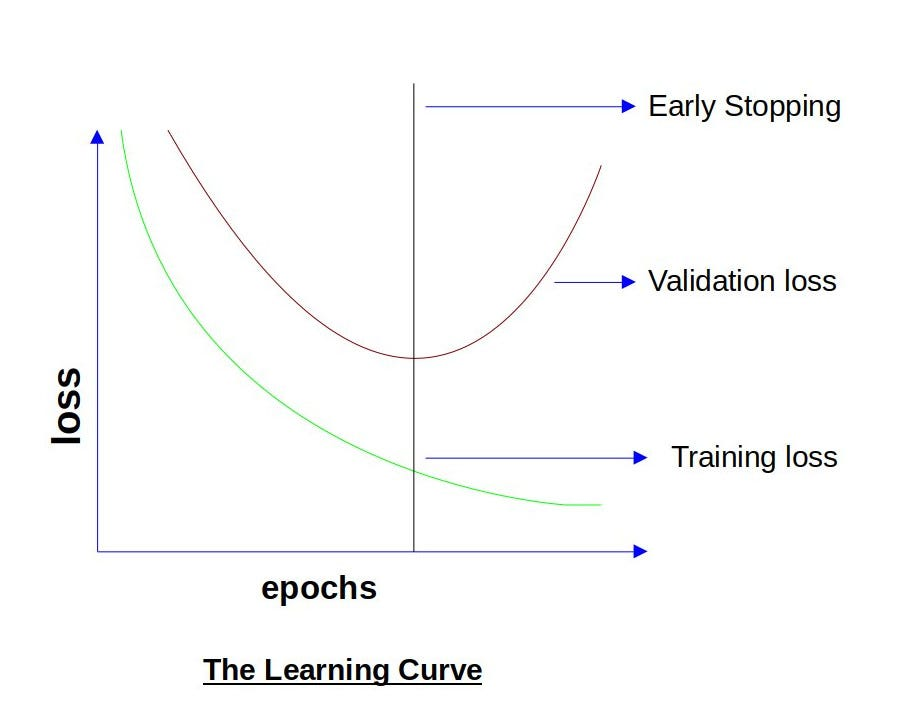

## 9. TinyVGG with Data Augmentation

### 9.1 Create Transform with Data Augmentation

In [88]:
#Create training transform with TrivialAugment
from torchvision.transforms import v2
from torchvision import transforms

train_transform_trivial = v2.Compose([
    v2.ToImage(),
    v2.RandomResizedCrop(size=(64, 64), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.TrivialAugmentWide(num_magnitude_bins=31),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform_trivial = v2.Compose([
    v2.ToImage(),
    v2.RandomResizedCrop(size=(64, 64), antialias=True),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
plot_transformed_images(image_paths=random_image_path)

### 9.2 Create train and test Dataset's DataLoader with Data Augmentation

In [89]:
#Turn image folder to Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial,
                                            )
test_data_augmented = datasets.ImageFolder(root=test_dir,
                                           transform=test_transform_trivial)

In [90]:
# Turn datasets to dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)
test_dataloader_augmented = DataLoader(dataset=test_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=False)

### 9.3 Construct and train model_1

In [97]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=30,
                  output_shape=len(class_names)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 30, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5070, out_features=3, bias=True)
  )
)

In [98]:
#Loss function
torch.manual_seed(42)
torch.cuda.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

EPOCHS = 10

#Start timer
from timeit import default_timer as timer
start_time = timer()

model_1_results = Model_Trainer(model=model_1,
                                train_dataloader=train_dataloader_augmented,
                                test_dataloader=test_dataloader_augmented,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                epochs=EPOCHS,
                                device=device)

end_time = timer()
print(f"Total Training TIme for model_1 : {end_time - start_time:.3f} sec")

Loading . . . :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 0 | Train Loss : 1.096 | Train Accuracy : 39.84 | Test Loss : 1.119 | Test Accuracy : 32.29 

Epoch : 1 | Train Loss : 0.992 | Train Accuracy : 52.73 | Test Loss : 1.166 | Test Accuracy : 29.17 

Epoch : 2 | Train Loss : 0.972 | Train Accuracy : 54.30 | Test Loss : 1.059 | Test Accuracy : 36.36 

Epoch : 3 | Train Loss : 0.992 | Train Accuracy : 45.70 | Test Loss : 1.068 | Test Accuracy : 39.30 

Epoch : 4 | Train Loss : 1.045 | Train Accuracy : 55.86 | Test Loss : 1.099 | Test Accuracy : 34.28 

Epoch : 5 | Train Loss : 1.098 | Train Accuracy : 40.23 | Test Loss : 1.079 | Test Accuracy : 32.29 

Epoch : 6 | Train Loss : 0.911 | Train Accuracy : 60.16 | Test Loss : 1.060 | Test Accuracy : 30.21 

Epoch : 7 | Train Loss : 1.077 | Train Accuracy : 51.56 | Test Loss : 1.071 | Test Accuracy : 27.08 

Epoch : 8 | Train Loss : 1.031 | Train Accuracy : 44.14 | Test Loss : 1.051 | Test Accuracy : 30.21 

Epoch : 9 | Train Loss : 1.005 | Train Accuracy : 53.12 | Test Loss : 0.960 | Test

In [93]:
model_1_results

{'train_loss': [1.10951566696167,
  1.0812143981456757,
  1.0611382350325584,
  1.0488298162817955,
  1.0337858125567436],
 'train_acc': [25.390625, 41.40625, 42.578125, 50.78125, 52.34375],
 'test_loss': [1.1105033953984578,
  1.1244364182154338,
  1.141971747080485,
  1.1457436680793762,
  1.1301687558492024],
 'test_acc': [22.916666666666664,
  26.041666666666668,
  28.125,
  28.125,
  30.208333333333332]}

### 9.4 Plot Loss Curves of model 1

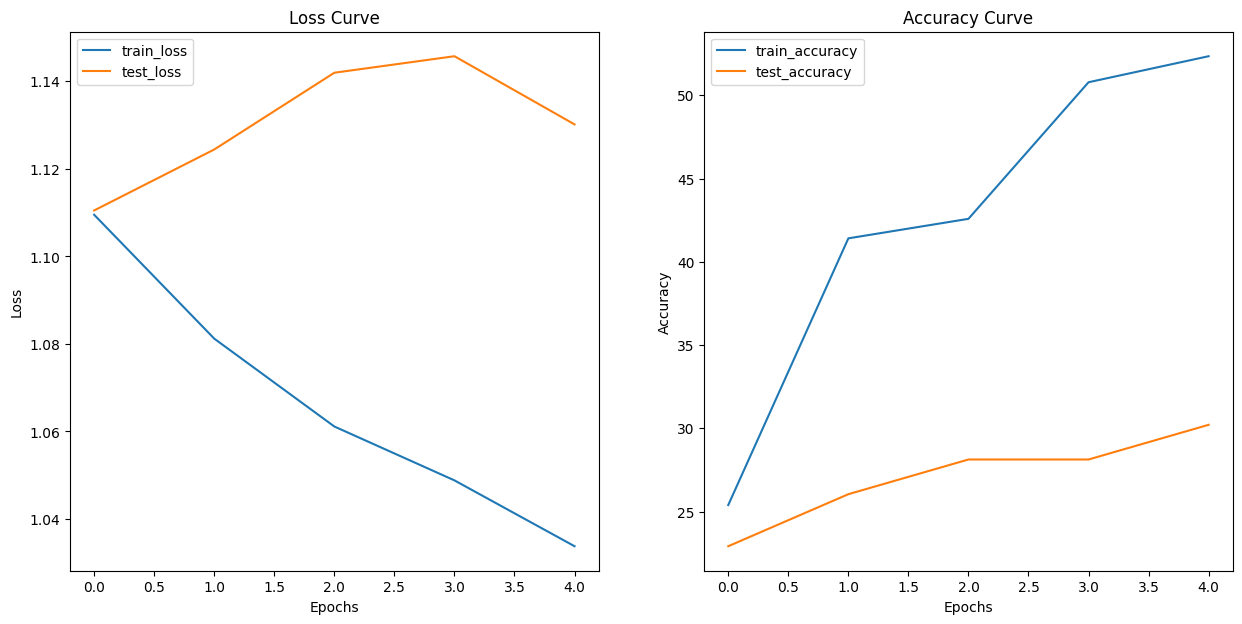

In [94]:
#Epochs=5, hidden_units=10
plot_loss_curves(model_1_results)

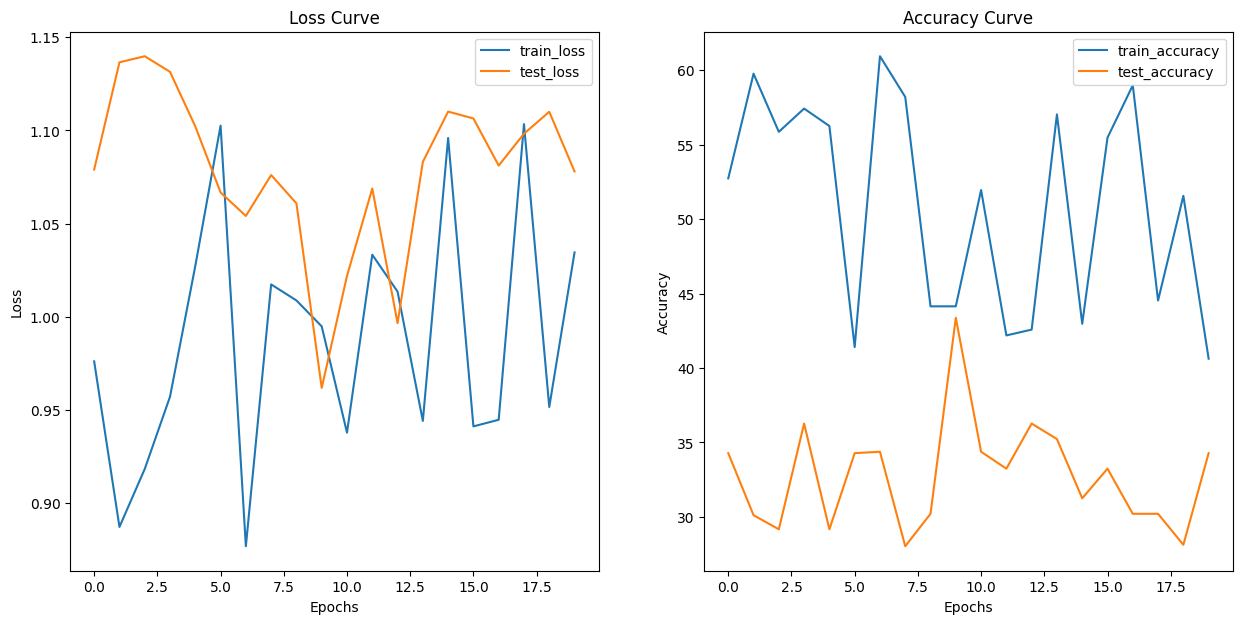

In [96]:
#Epochs=20, hidden_units=10
plot_loss_curves(model_1_results)

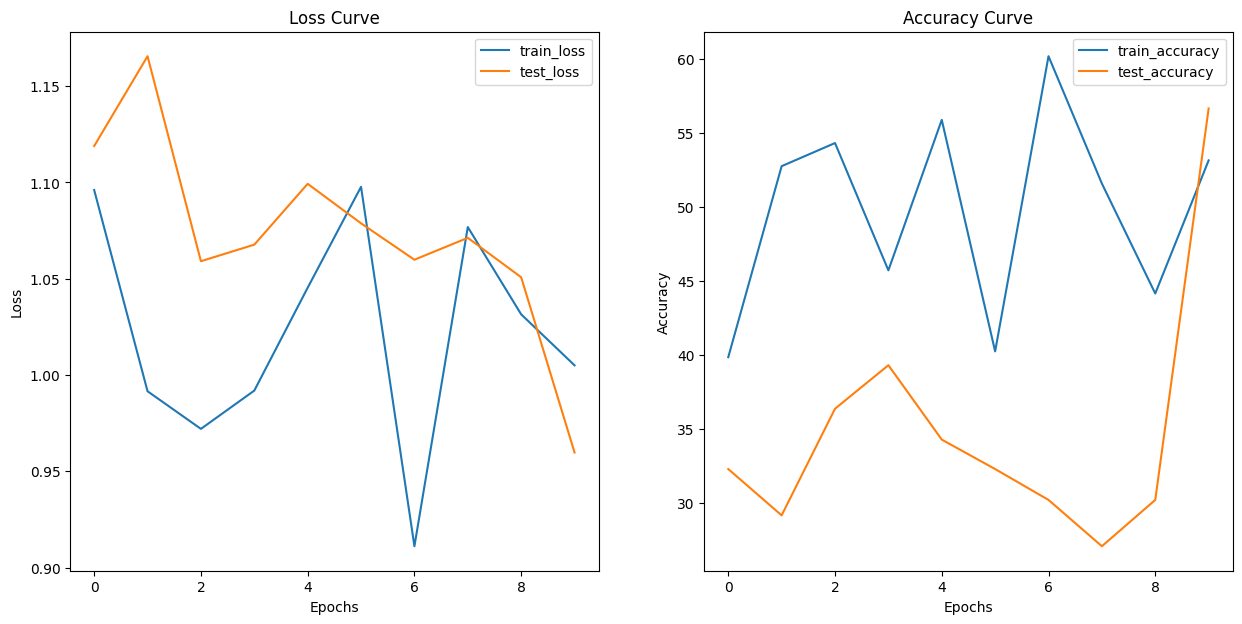

In [99]:
#Epochs=10, hidden_units=30
plot_loss_curves(model_1_results)